# Retention Study - Figuring Out Which Employees May Quit
### Loading our Main HR Database Records

In [0]:
import pandas as pd

# Load HR dataset
hr_df = pd.read_csv('./data/hr_data.csv') 

# We use the dataframe name followed by a '.head()' to use the head function to 
# preview the first 5 records of the dataframe. If you wanted to preview the first 10, simply 
# put dataframe_name.head(10)
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [0]:
# View the bottom 5 rows
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [0]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [0]:
# View which columns are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [0]:
# Display values in categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [0]:
# How many rows are in our dataset?
len(hr_df)

14999

In [0]:
# What about how many columns?
len(hr_df.columns)

9

In [0]:
hr_df.shape

(14999, 9)

### Loading our Evaluation and Employee Satisfaction Data

In [0]:
# Load employee evaluation and satisfaction data
emp_satis_eval = pd.read_excel ('./data/employee_satisfaction_evaluation.xlsx') 

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [0]:
emp_satis_eval.shape

(14999, 3)

### Merge or Join Tables

In [0]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


### Is our dataset good? Are there missing values?

In [0]:
#main_df.isnull()
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


### Let's fill in the missing blanks with the aveage values

In [0]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [0]:
main_df[main_df.employee_id == 3794]
#main_df.loc[main_df['employee_id'] == 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [0]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [0]:
# Removing employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [0]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [0]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [0]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [0]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [0]:
main_df.shape

(14999, 11)

### Displaying Your Correlation Matrix

No handles with labels found to put in legend.


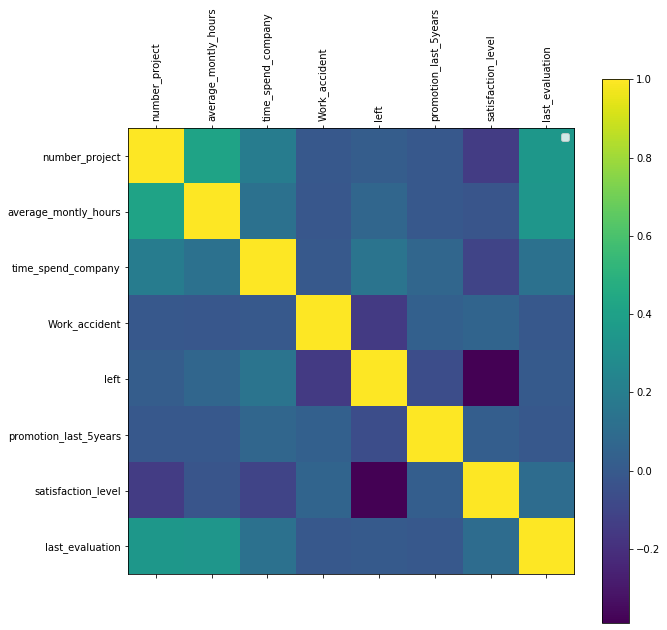

In [0]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

## Preparing out  Dataset for ML

In [0]:
# Perform One Hot Encoding on Categorical Data

categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [0]:
# How many columns do we now have now?

len(main_df_final.columns)

19

In [0]:
# How many employees in the dataset have left?

#len(main_df_final.loc[main_df_final['left'] == 1])
len(main_df_final[main_df_final['left'] == 1])

3571

In [0]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


## Preparing our Dataset for Machine Learning

In [0]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['left'],axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['left'].values


In [0]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.972517,1.284501,-0.338020,-0.416965,-0.146297,-0.094343,-0.376313,-0.232174,-0.236471,-0.228736,-0.21063,-0.247282,-0.257319,-0.613495,-0.417122,-0.471871,-0.973956,1.149902
1,0.972517,0.504159,-1.025252,2.398284,-0.146297,0.147384,1.436661,-0.232174,-0.236471,-0.228736,-0.21063,4.043973,-0.257319,-0.613495,-0.417122,-0.471871,-0.973956,1.149902
2,0.161777,1.364536,-1.025252,-0.416965,-0.146297,0.912856,-1.370524,-0.232174,-0.236471,-0.228736,-0.21063,-0.247282,-0.257319,-0.613495,-0.417122,-0.471871,-0.973956,1.149902
3,0.161777,-0.836430,0.349213,-0.416965,-0.146297,-0.376359,-1.078109,-0.232174,-0.236471,-0.228736,-0.21063,-0.247282,-0.257319,1.630004,-0.417122,-0.471871,1.026741,-0.869640
4,0.161777,1.104422,1.036445,-0.416965,-0.146297,-1.665575,-1.721422,-0.232174,-0.236471,4.371845,-0.21063,-0.247282,-0.257319,-0.613495,-0.417122,-0.471871,1.026741,-0.869640


In [38]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,7.707268e-17,8.390913e-17,-3.566905e-16,-2.841596e-16,-2.890730e-15,3.003497e-14,4.124685e-14,-6.628821e-16,6.612854e-16,-5.660668e-16,5.771595e-16,5.707883e-16,-2.251852e-16,9.949180e-16,7.004588e-16,2.921222e-16,9.656265e-16,-7.773147e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.459702e+00,-2.096983e+00,-1.025252e+00,-4.169647e-01,-1.462972e-01,-2.108743e+00,-2.072320e+00,-2.321742e-01,-2.364714e-01,-2.287364e-01,-2.106297e-01,-2.472816e-01,-2.573190e-01,-6.134953e-01,-4.171221e-01,-4.718709e-01,-9.739556e-01,-8.696396e-01
25%,-6.489622e-01,-8.964559e-01,-3.380197e-01,-4.169647e-01,-1.462972e-01,-6.986633e-01,-9.026598e-01,-2.321742e-01,-2.364714e-01,-2.287364e-01,-2.106297e-01,-2.472816e-01,-2.573190e-01,-6.134953e-01,-4.171221e-01,-4.718709e-01,-9.739556e-01,-8.696396e-01
50%,1.617772e-01,-3.607831e-02,-3.380197e-01,-4.169647e-01,-1.462972e-01,1.070965e-01,3.306848e-02,-2.321742e-01,-2.364714e-01,-2.287364e-01,-2.106297e-01,-2.472816e-01,-2.573190e-01,-6.134953e-01,-4.171221e-01,-4.718709e-01,-9.739556e-01,-8.696396e-01
75%,9.725167e-01,8.843256e-01,3.492128e-01,-4.169647e-01,-1.462972e-01,8.322802e-01,9.103138e-01,-2.321742e-01,-2.364714e-01,-2.287364e-01,-2.106297e-01,-2.472816e-01,-2.573190e-01,1.630004e+00,-4.171221e-01,-4.718709e-01,1.026741e+00,1.149902e+00
max,2.593996e+00,2.184896e+00,4.472608e+00,2.398284e+00,6.835402e+00,1.557464e+00,1.670593e+00,4.307112e+00,4.228841e+00,4.371845e+00,4.747669e+00,4.043973e+00,3.886227e+00,1.630004e+00,2.397380e+00,2.119224e+00,1.026741e+00,1.149902e+00


## Let's Train a Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.24%
[[3162  272]
 [ 662  404]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3434
           1       0.60      0.38      0.46      1066

    accuracy                           0.79      4500
   macro avg       0.71      0.65      0.67      4500
weighted avg       0.77      0.79      0.77      4500



### Let's Try a Random Forest Classifer

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.98%
[[3425    9]
 [  37 1029]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3434
           1       0.99      0.97      0.98      1066

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [41]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [42]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [43]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.320823
2,0.180144
0,0.177543
1,0.155997
6,0.119724
3,0.009510
16,0.009161
17,0.004445
13,0.003864
15,0.003851


### Can Deep Learning Make a Difference?

In [44]:
# Use the newest version of TensorFlow 2.0
%tensorflow_version 2.x 

TensorFlow 2.x selected.


In [0]:
# If you wish to use Tensorflow 1.X run the following line and then restart runtime
# %tensorflow_version 1.x 
# You'll need to change your import statements from tensorflow.keras to keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [46]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Start Training Our Classifier 
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 3s 271us/sample - loss: 0.4182 - accuracy: 0.8273 - val_loss: 0.2669 - val_accuracy: 0.9033
Epoch 2/25
10499/10499 [==============================] - 2s 212us/sample - loss: 0.2318 - accuracy: 0.9242 - val_loss: 0.1927 - val_accuracy: 0.9409
Epoch 3/25
10499/10499 [==============================] - 2s 203us/sample - loss: 0.1894 - accuracy: 0.9454 - val_loss: 0.1701 - val_accuracy: 0.9493
Epoch 4/25
10499/10499 [==============================] - 2s 202us/sample - loss: 0.1757 - accuracy: 0.9501 - val_loss: 0.1627 - val_accuracy: 0.9493
Epoch 5/25
10499/10499 [==============================] - 2s 197us/sample - loss: 0.1701 - accuracy: 0.9511 - val_loss: 0.1609 - val_accuracy: 0.9504
Epoch 6/25
10499/10499 [==============================] - 2s 204us/sample - loss: 0.1665 - accuracy: 0.9507 - val_loss: 0.1572 - val_accuracy: 0.9509
Epoch 7/25
10499/10499 [===========================

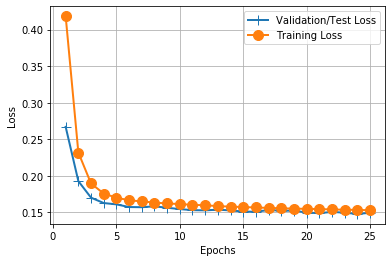

In [48]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = 'o', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

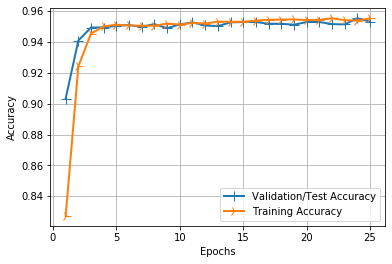

In [50]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Displaying the Classification Report and Confusion Matrix

In [51]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3326  108]
 [ 103  963]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3434
           1       0.90      0.90      0.90      1066

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500



# Let's a Deeper Model

In [52]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 3
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [0]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training our Deeper Model

In [54]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 4s 395us/sample - loss: 0.6498 - accuracy: 0.9058 - val_loss: 0.2819 - val_accuracy: 0.9433
Epoch 2/25
10499/10499 [==============================] - 4s 337us/sample - loss: 0.2823 - accuracy: 0.9387 - val_loss: 0.2452 - val_accuracy: 0.9533
Epoch 3/25
10499/10499 [==============================] - 3s 325us/sample - loss: 0.2609 - accuracy: 0.9429 - val_loss: 0.2307 - val_accuracy: 0.9567
Epoch 4/25
10499/10499 [==============================] - 3s 330us/sample - loss: 0.2601 - accuracy: 0.9416 - val_loss: 0.2315 - val_accuracy: 0.9513
Epoch 5/25
10499/10499 [==============================] - 4s 338us/sample - loss: 0.2500 - accuracy: 0.9433 - val_loss: 0.2308 - val_accuracy: 0.9531
Epoch 6/25
10499/10499 [==============================] - 3s 333us/sample - loss: 0.2455 - accuracy: 0.9445 - val_loss: 0.2405 - val_accuracy: 0.9442
Epoch 7/25
10499/10499 [===========================

In [55]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3322  112]
 [ 107  959]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3434
           1       0.90      0.90      0.90      1066

    accuracy                           0.95      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.95      0.95      0.95      4500

